# Introduction

## Diabetes Prediction

**Problème de classifiication:** Le but de ce projet est de **prédire la présence de diabète chez une personne** (variable `Outcome`) en fonction de divers paramètres tels que la pression sanguine, le body-mass index (BMI), etc.

**Problème de régression:** Le but de ce projet est de **prédire le taux de glucose d'une personne** (variable `Glucose`) en fonction de divers paramètres tels que la pression sanguine, le body-mass index (BMI), etc.

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

    ## Exercice


### Load Data
1. Loadez et examinez les data.<br>
   ```
   df = pd.read_csv('./data/diabetes.csv')
   ```

### Train-Test Split
2. Spittez les data en un **train set** et un **test set** selon les proportions 80% / 20%.<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
   ```
   X_train, X_test, y_train, y_test = train_test_split(...)
   ```
   Comprenez ce que vous êtes en train de faire.


### Data Analysis
3. Vérifiez s'il existe des data dupliquées ou manquantes:<br>
   ```
   train_df.duplicated().sum()
   train_df.isna().values.sum()
   ```

4. Vérifiez s'il existe des data qui valent 0:<br>
   ```
   (train_df == 0).sum()
   ```

5. Dans les colonnes où cela est pertinent, remplacez les 0 par la moyennes des valeurs non nulle:<br>
   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html<br>
   **Remarque:** cette pratique, appelée **imputing** s'effectue normalement après le train-test split...


6. Visualisez la répartition des valeurs de la variable `Outcome`:<br> 
   ```
   ...
   sns.countplot(y_train, order=y_train.value_counts().index)
   plt.xticks(rotation = 15)
   ...
   ```
   
7. Visualisez la répartition des valeurs de la variable `Glucose`:<br> 
   ```
   ...
   plt.scatter(train_df.index, train_df.Glucose, c=df.Outcome)
   ...
   ```


### > Problème de classification


### Model and Results
8. Instanciez et entraînez une **régression logistique** `LogisticRegression` sur vos data (nous verrons ce modèle plus en détails par la suite):<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
    Le processus s'effectue en 3 étapes:
    1. Instanciation du modèle
    2. Entraînement du modèle sur le train set (méthode `fit(...)`)
    3. Prédictions et évaluation sur le test set


9. Calculez ensuite le **rapport de classification** de votre modèle sur le test set:<br>
    Que représentent la **precision**, le **recall**, l'**accuracy** et le **F1-score**?<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html<br>    
    

### > Problème de régression
### Train-Test Split
10. Spittez les data en un **train set** et un **test set** selon les proportions 80% / 20%.<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
   ```
   X_train, X_test, y_train, y_test = train_test_split(...)
   ```
   Comprenez ce que vous êtes en train de faire.


### Model and Results
11. Instanciez et entraînez une **régression linéaire** `LinearRegression` sur vos data (nous verrons ce modèle plus en détails par la suite):<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html<br>
    Le processus s'effectue en 3 étapes:
    1. Instanciation du modèle
    2. Entraînement du modèle sur le train set (méthode `fit(...)`)
    3. Prédictions et évaluation sur le test set


12. Faites le graphique des `y` que vous avez prédits sur le test set en fonction des vraies valeurs `y_test`.<br>
   Ce graphique devrrait avoir une allure diagonale, pourquoi? Est-ce le cas ici?

## Libraries

In [3]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [ ]:
%%sql


In [9]:
df = pd.read_csv('./data/diabetes.csv')

In [5]:
X = df.drop('Outcome', axis=1) # Prend toutes les colonnes en compte sauf outcome(diebete :1 ou 0)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [6]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [7]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


## Data Analysis

In [12]:
# X train y train sont les input et output du dataset d'entrainement, on veut voir x test et y test, sont les input/output du dataset de test
df.head # Montre les 5 premières lignes et les 5 dernières

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

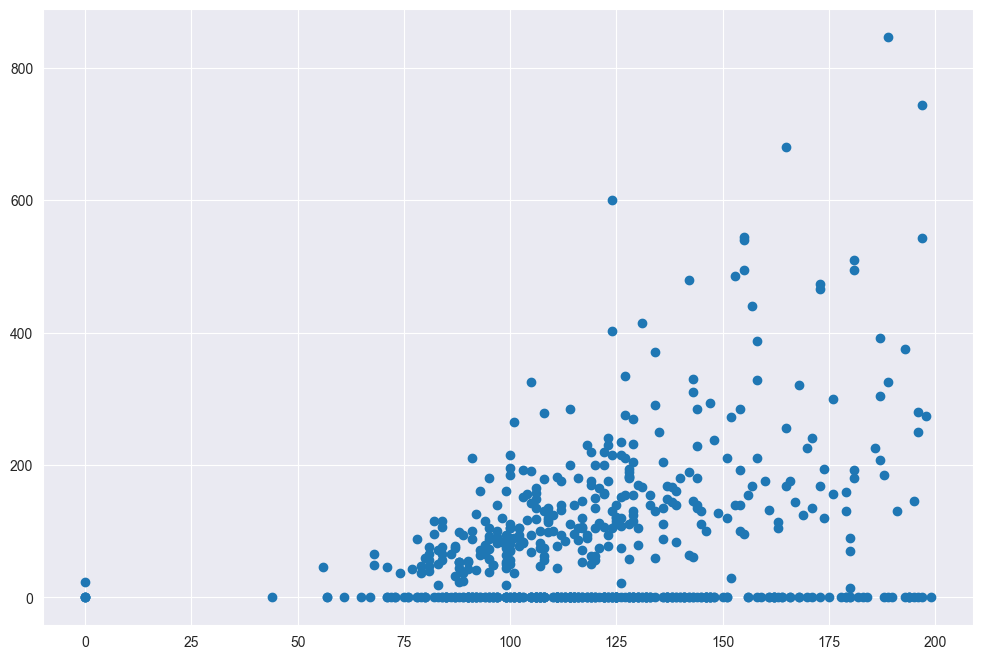

In [22]:
df.shape #Affiche le nb de ligne et de colonne
X = df['Glucose'] # Prend la colonne Glucose
y = df['Insulin']  #Prend la colonne Insulin
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)
plt.figure(figsize=(12, 8))
plt.scatter(X_train , y_train , label="valeurs d'entraînement") # Affiche les valeurs d'entraînement



> ## Problème de classification

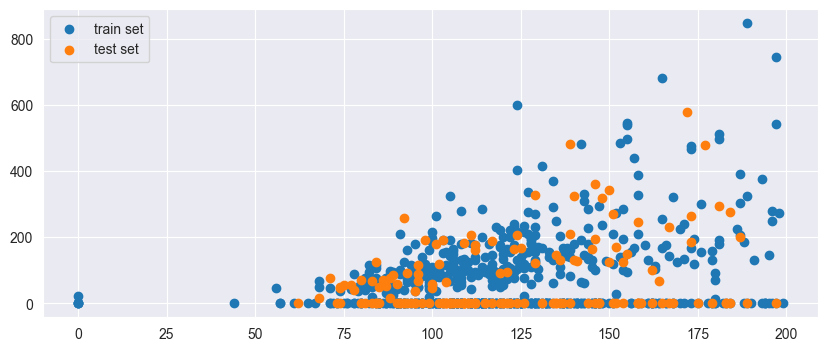

In [26]:
plt.figure(figsize=(10, 4))
plt.scatter(X_train, y_train, label="train set")
plt.scatter(X_test, y_test, label="test set")          # On sépare les valeurs de test et les valeurs d'entrainement
plt.legend()
plt.show()

## Train-Test Split

In [24]:
x_bar = np.mean(X_train)
y_bar = np.mean(y_train)

In [25]:
num = np.sum((X_train - x_bar) * (y_train - y_bar))
den = np.sum((X_train - x_bar)**2)

beta_hat_1 = num / den
beta_hat_0 = y_bar - beta_hat_1 * x_bar

In [27]:
beta_hat_0, beta_hat_1

(np.float64(-66.36650866492697), np.float64(1.2229908539891539))

## Model and Results

> ## Problème de régression

## Train-Test Split

## Models and Results